# A Network Tour of Data Science
### &nbsp; &nbsp; &nbsp; Xavier Bresson, Winter 2016/17
## Exercise 3 : Baseline Classification Techniques

In [1]:
# Load libraries
import numpy as np # Math
import scipy.io # Import data
import time
import sklearn.neighbors, sklearn.linear_model, sklearn.ensemble, sklearn.naive_bayes # Baseline classification techniques
import matplotlib.pyplot as plt

In [2]:
# Load 400 text documents representing 5 classes
# X_train matrix contains the training data
# y_train vector contains the training labels
# X_test matrix contains the test data
# y_test vector contains the test labels
[X_train, y_train, X_test, y_test] = np.load('datasets/20news_5classes_400docs.npy')
print('X_train size=',X_train.shape)
print('X_test size=',X_test.shape)
print('y_train size=',y_train.shape)
print('y_test size=',y_test.shape)

X_train size= (200, 7939)
X_test size= (200, 7939)
y_train size= (200,)
y_test size= (200,)


### Question 1a: Run the following baseline classification techniques:
* k-NN classifier: You may use *sklearn.neighbors.KNeighborsClassifier()*
* Linear SVM classifier: You may use *sklearn.svm.LinearSVC()*
* Logistic Regression classifier: You may use *sklearn.linear_model.LogisticRegression()*
* Random Forest classifier: You may use *sklearn.ensemble.RandomForestClassifier()*
* Ridge classifier: You may use *sklearn.linear_model.RidgeClassifier()*
* Naive Bayes classifier with Bernoulli: You may use *sklearn.naive_bayes.BernoulliNB()*
* Naive Bayes classifier with Multinomial: You may use *sklearn.naive_bayes.MultinomialNB()*

### Question 1b: 
* Print accuracy for train dataset and test dataset: You may use function *sklearn.metrics.accuracy_score()*
* Print the computational time to train each model: You may use commands *t_start = time.process_time()*, and *exec_time = time.process_time() - t_start*

In [3]:
# Your code here
clf, train_accuracy, test_accuracy, exec_time = [], [], [], []
clf.append(sklearn.neighbors.KNeighborsClassifier()) # k-NN classifier
clf.append(sklearn.svm.LinearSVC()) # linear SVM classifier
clf.append(sklearn.linear_model.LogisticRegression()) # logistic classifier
clf.append(sklearn.ensemble.RandomForestClassifier())
clf.append(sklearn.linear_model.RidgeClassifier())
clf.append(sklearn.naive_bayes.BernoulliNB())
clf.append(sklearn.naive_bayes.MultinomialNB())

for c in clf:
    t_start = time.process_time()
    c.fit(X_train, y_train)
    train_pred = c.predict(X_train)
    test_pred = c.predict(X_test)
    train_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_train, train_pred)))
    test_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_test, test_pred)))
    exec_time.append('{:5.2f}'.format(time.process_time() - t_start))
print('Train accuracy:      {}'.format(' '.join(train_accuracy)))
print('Test accuracy:       {}'.format(' '.join(test_accuracy)))
print('Execution time:      {}'.format(' '.join(exec_time)))

Train accuracy:      57.50 99.50 94.50 99.00 99.50 83.50 97.00
Test accuracy:       39.50 89.00 40.00 61.50 86.00 58.50 51.00
Execution time:       0.01  0.01  0.01  0.03  0.02  0.01  0.00


Observe the best result. What is the best technique?<br> 
Do you think the other classification techniques are not as efficient?<br> 
Should you believe all blackbox data analysis techniques?

Let us consider one classification technique like logistic regression:<br>
    *model = sklearn.linear_model.LogisticRegression(C=C_value)*<br>
and its hyperparamater C, which is the trade-off between the data term and the regularization term.

### Question 2: Estimate the hyperparameter C of the logistic regression classifier by cross-validation 

### Question 2a: First, split the training set into 5 folds

Hint: You may use the function *np.array_split()*

In [4]:
num_folds = 5 
X_train = X_train.toarray() # for np.array_split

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

Values of the hyperparameter C:

In [5]:
C_choices = [1e-2, 5*1e-2, 1e-1, 5*1e-1, 1e0, 5*1e0, 1e1, 5*1e1, 1e2, 5*1e2, 1e3, 5*1e3]
num_Cs = len(C_choices)

### Question 2b: Compute the accuracy for all folds and all hyperparameter values (and store it for example in a tab like *accuracy_tab*)

In [6]:
accuracy_tab = np.zeros([num_folds,num_Cs])

for C_idx, C_value in enumerate(C_choices):

    for fold_idx in range(num_folds):
        
        # Extract train dataset for the current fold
        fold_x_train = np.concatenate([X_train_folds[i] for i in range(num_folds) if i!=fold_idx])       
        fold_y_train = np.concatenate([y_train_folds[i] for i in range(num_folds) if i!=fold_idx])   

        # validation dataset for the current fold
        fold_x_val  = X_train_folds[fold_idx]
        fold_y_val  = y_train_folds[fold_idx]
        
        # Run Logistic Regression model for the current fold
        model = sklearn.linear_model.LogisticRegression(C=C_value)
        model.fit(fold_x_train, fold_y_train)
        test_pred = model.predict(fold_x_val)
        accuracy = sklearn.metrics.accuracy_score(test_pred, fold_y_val)
        
        # Store accuracy value
        accuracy_tab[fold_idx,C_idx] = accuracy

print(accuracy_tab)

[[ 0.425  0.425  0.45   0.6    0.65   0.825  0.825  0.85   0.85   0.875
   0.875  0.875]
 [ 0.225  0.225  0.225  0.25   0.35   0.625  0.725  0.8    0.825  0.85
   0.775  0.675]
 [ 0.175  0.175  0.175  0.175  0.2    0.575  0.675  0.8    0.8    0.8
   0.775  0.7  ]
 [ 0.25   0.25   0.25   0.4    0.45   0.775  0.8    0.8    0.8    0.825
   0.8    0.75 ]
 [ 0.2    0.2    0.2    0.225  0.25   0.55   0.675  0.825  0.825  0.775
   0.725  0.625]]


### Question 2c: Plot the following:
* The accuracy values for all folds and all hyperparameter values
* The mean and standard deviation accuracies over the folds for all hyperparameter values

Hint: You may use the function *plt.scatter(), np.mean(), np.std(), plt.errorbar(), plt.show()*

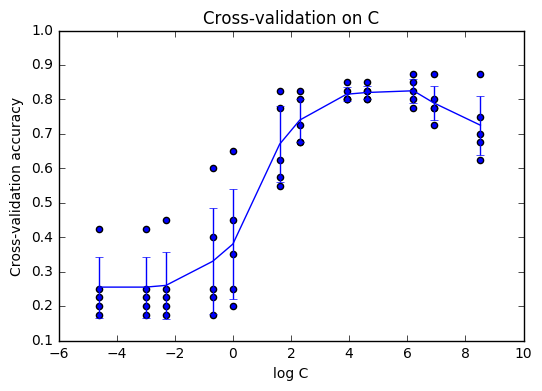

In [7]:
# plot the raw observations
for C_idx, C_value in enumerate(C_choices):
    accuracies_C_idx = accuracy_tab[:,C_idx]
    plt.scatter([np.log(C_value)]* len(accuracies_C_idx), accuracies_C_idx)
    
# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.mean(accuracy_tab,axis=0)
accuracies_std = np.std(accuracy_tab,axis=0)
plt.errorbar(np.log(C_choices), accuracies_mean, yerr=accuracies_std)

# Add text
plt.title('Cross-validation on C')
plt.xlabel('log C')
plt.ylabel('Cross-validation accuracy')

plt.show()

### Question 2d: Based on the cross-validation results above, choose the best value for C for the classifier, and apply it on the test set. What is the accuracy?

Did we do better than the best technique in Question 1? or not?

Hint: You may use the function *np.argmax()*

In [8]:
idx_best_C = np.argmax(accuracies_mean)
best_C = C_choices[idx_best_C]
model = sklearn.linear_model.LogisticRegression(C=best_C)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_testset = sklearn.metrics.accuracy_score(test_pred, y_test)
print('best accuracy=',accuracy_testset)

best accuracy= 0.92
